In [1]:
%load_ext autoreload
%autoreload 2

import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
import diffxpy.api as de

# Read data:

Read data. This data is result from using the Parker lab thresholds in Anderson pipeline.

In [3]:
data = sc.read_h5ad("../results/nf-sample_qc=parker_singlet-parameter_sweep_v001_harmony/normalize=total_count.vars_to_regress=none.hvg_exclude=data-variable_gene_filter_ribo_mt.scores=data-gene_scores/reduced_dims-vars_to_regress=none-harmony.n_pcs=23.variables=experiment_id.thetas=1.0/cluster.number_neighbors=30.method=leiden.resolution=0.25/adata-normalized_pca-umap-clustered.h5ad")

# Running cluster-specific testing

We can now partition the data set by cluster and conduct a test across conditions in each cell type.

In [17]:
part = de.test.partition(
    data=data,
    parts="cluster"
)
test_part = part.wald(
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    size_factors=data.obs["normalization_factor"]
)

training location model: True
training scale model: True
iter   0: ll=220871631505.539398
iter   1: ll=220871631505.539398, converged: 0.00% (loc: 100.00%, scale update: False), in 89.17sec
Fitting 22741 dispersion models: (progress not available with multiprocessing)

Process ForkPoolWorker-6:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
 

EOFError: Ran out of input

  File "/usr/local/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 2166, in _minimize_scalar_brent
    brent.optimize()
  File "/usr/local/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 2017, in optimize
    fu = func(*((u,) + self.args))      # calculate new output value
  File "/Users/taylorhj/repo/batchglm/batchglm/train/numpy/base_glm/estimator.py", line 421, in cost_b_var
    return - np.sum(ll(data_jj, eta_loc_jj, x, xh_scale_jj))
  File "/Users/taylorhj/repo/batchglm/batchglm/train/numpy/glm_nb/model.py", line 238, in fun
    x * (eta_loc - log_r_plus_mu) + \
KeyboardInterrupt


Note that there is one test and p-value for each partition for each gene now. We can summarize test statistics across partitions using summary:

In [ ]:
test_part.summary().iloc[:10, :]

Or look the results of a single partition:

In [ ]:
test_part.tests[test_part.partitions.index("c1")].summary().iloc[:10, :]

# Find cluster-specific gene progression across condition

First, get the conditions as a continuous value (0, 1, 2) to use in the model. We also want to set up a partition object, so we can test each cluster. 

In [4]:
data.obs["condition_cont"] = [["Normal", "preT1D", "T1D"].index(x) for x in data.obs["detailed_cond"]]

In [8]:
part = de.test.partition(
    data=data,
    parts="cluster"
)

Now run the model.

For each cluster, look at the DE when looking at the continouous variable, `condition_cont` which is a 3 stage progression into 

In [16]:
part_det = part.wald(
    formula_loc="~ 1 + condition_cont",
    factor_loc_totest="condition_cont",
    as_numeric="condition_cont",
    size_factors=data.obs["normalization_factor"]
)

/usr/local/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


training location model: True
training scale model: True
iter   0: ll=220871631505.539398
iter   1: ll=220871631505.539398, converged: 0.00% (loc: 100.00%, scale update: False), in 70.93sec
iter   2: ll=220871631505.539398, converged: 100.00% (loc: 100.00%, scale update: True), in 969.40sec


/usr/local/lib/python3.7/site-packages/dask/array/core.py:2626: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


training location model: True
training scale model: True
iter   0: ll=102045194852.328278
iter   1: ll=102045194852.328278, converged: 0.00% (loc: 100.00%, scale update: False), in 37.37sec
iter   2: ll=102045194852.328278, converged: 100.00% (loc: 100.00%, scale update: True), in 581.82sec


/usr/local/lib/python3.7/site-packages/dask/array/core.py:2626: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


training location model: True
training scale model: True
iter   0: ll=54629754994.812981
iter   1: ll=54629754994.812981, converged: 0.00% (loc: 100.00%, scale update: False), in 20.36sec
iter   2: ll=54629754994.812981, converged: 100.00% (loc: 100.00%, scale update: True), in 217.65sec


/usr/local/lib/python3.7/site-packages/dask/array/core.py:2626: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


training location model: True
training scale model: True
iter   0: ll=39148377025.816788
iter   1: ll=39148377025.816788, converged: 0.00% (loc: 100.00%, scale update: False), in 14.56sec
iter   2: ll=39148377025.816788, converged: 100.00% (loc: 100.00%, scale update: True), in 183.60sec


/usr/local/lib/python3.7/site-packages/dask/array/core.py:2626: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


training location model: True
training scale model: True
iter   0: ll=24437598752.869244
iter   1: ll=24437598752.869244, converged: 0.00% (loc: 100.00%, scale update: False), in 10.33sec
iter   2: ll=24437598752.869244, converged: 100.00% (loc: 100.00%, scale update: True), in 108.81sec


/usr/local/lib/python3.7/site-packages/dask/array/core.py:2626: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


training location model: True
training scale model: True
iter   0: ll=6324742006.722087
iter   1: ll=6324742006.722087, converged: 0.00% (loc: 100.00%, scale update: False), in 3.62sec
iter   2: ll=6324742006.722087, converged: 100.00% (loc: 100.00%, scale update: True), in 49.39sec


/usr/local/lib/python3.7/site-packages/dask/array/core.py:2626: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


training location model: True
training scale model: True
iter   0: ll=3726166736.310127
iter   1: ll=3726166736.310127, converged: 0.00% (loc: 100.00%, scale update: False), in 2.66sec
iter   2: ll=3726166736.310127, converged: 100.00% (loc: 100.00%, scale update: True), in 43.58sec


/usr/local/lib/python3.7/site-packages/dask/array/core.py:2626: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


training location model: True
training scale model: True
iter   0: ll=2144384938.131994
iter   1: ll=2144384938.131994, converged: 0.00% (loc: 100.00%, scale update: False), in 2.45sec
iter   2: ll=2144384938.131994, converged: 100.00% (loc: 100.00%, scale update: True), in 39.81sec


/usr/local/lib/python3.7/site-packages/dask/array/core.py:2626: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


In [21]:
part_det.partitions

['0', '1', '2', '3', '4', '5', '6', '7']

In [48]:
part_det.tests[1].summary().sort_values(["log2fc", "pval"], ascending=[False, True])

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,ENSG00000238009,0.0,0.0,9.436300e-17,0.118751,False,1.786246e+123,9.436300e-17,5.602691e-64,-4.758461e+06
1,ENSG00000237491,0.0,0.0,9.436300e-17,0.163883,False,1.786246e+123,9.436300e-17,5.602691e-64,-4.758461e+06
2,ENSG00000177757,0.0,0.0,9.436300e-17,0.008338,False,1.786246e+123,9.436300e-17,5.602691e-64,-4.758461e+06
3,ENSG00000225880,0.0,0.0,9.436300e-17,0.164874,False,1.786246e+123,9.436300e-17,5.602691e-64,-4.758461e+06
4,ENSG00000230368,0.0,0.0,9.436300e-17,0.298408,False,1.786246e+123,9.436300e-17,5.602691e-64,-4.758461e+06
...,...,...,...,...,...,...,...,...,...,...
22499,ENSG00000197934,1.0,1.0,0.000000e+00,0.000000,True,2.770133e-127,0.000000e+00,8.129575e+62,-1.769463e-123
22503,ENSG00000154736,1.0,1.0,0.000000e+00,0.000000,True,2.770133e-127,0.000000e+00,8.129575e+62,-1.769463e-123
22677,ENSG00000230061,1.0,1.0,0.000000e+00,0.000000,True,2.770133e-127,0.000000e+00,8.129575e+62,-1.769463e-123
22704,ENSG00000224413,1.0,1.0,0.000000e+00,0.000000,True,2.770133e-127,0.000000e+00,8.129575e+62,-1.769463e-123


In [49]:
help(part_det.tests[1])

Help on DifferentialExpressionTestWald in module diffxpy.testing.det object:

class DifferentialExpressionTestWald(_DifferentialExpressionTestSingle)
 |  DifferentialExpressionTestWald(model_estim: batchglm.models.base.estimator.EstimatorBaseTyping, col_indices: numpy.ndarray, noise_model: str, sample_description: pandas.core.frame.DataFrame)
 |  
 |  Single wald test per gene.
 |  
 |  Method resolution order:
 |      DifferentialExpressionTestWald
 |      _DifferentialExpressionTestSingle
 |      _DifferentialExpressionTest
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model_estim: batchglm.models.base.estimator.EstimatorBaseTyping, col_indices: numpy.ndarray, noise_model: str, sample_description: pandas.core.frame.DataFrame)
 |      :param model_estim:
 |      :param col_indices: indices of coefs to test
 |  
 |  log_fold_change(self, base=2.718281828459045, **kwargs)
 |      Returns one fold change per gene
 |      
 |      Returns coefficient if on

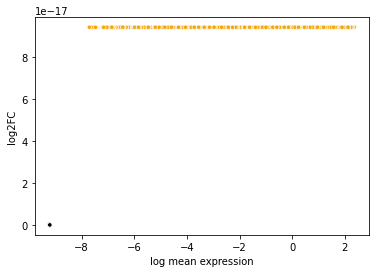

In [47]:
# part_det.tests[7].plot_volcano(corrected_pval=True, min_fc=1.05, alpha=0.05, size=20)
part_det.tests[1].plot_ma()